# **CHURN MODELLING:** Predicting the no of customers who will be exiting the bank.

In [1]:
!pip install keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
#importing the dataset
dataset= pd.read_csv("Churn_Modelling.csv")

In [4]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [7]:
#Converting the categorical features
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [8]:
#Concatenate the dataframes
X=pd.concat([X, geography, gender], axis=1)

In [9]:
#Dropping the unnecessary columns
X = X.drop(['Geography', 'Gender'], axis=1)

In [10]:
#Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [13]:
y_train

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
...,...
5734,0
5191,0
5390,1
860,1


In [14]:
# !pip uninstall -y tensorflow

In [15]:
# !pip install tensorflow --upgrade

In [16]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [17]:
!pip install scikit-learn --upgrade

In [18]:
!pip install scikeras

In [19]:
# !pip show scikit-learn
# !pip show scikeras
# !pip show tensorflow

In [20]:
# #Perform hyperparameter optimization
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV


# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
# from tensorflow.keras.activations import relu, sigmoid

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the model creation function
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:  # First hidden layer
            model.add(Dense(nodes, input_shape=(X_train.shape[1],)))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:  # Subsequent hidden layers
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate KerasClassifier with the build function
model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'model__layers': [(20,), (40, 20), (45, 30, 15)],  # Various layer architectures
    'model__activation': ['sigmoid', 'relu'],  # Different activation functions
    'batch_size': [128, 256],  # Batch sizes to try
    'epochs': [30]  # Number of epochs
}

# Use GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

# Print best parameters and performance
print(f"Best parameters found: {grid_result.best_params_}")
print(f"Best cross-validation accuracy: {grid_result.best_score_}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best parameters found: {'batch_size': 128, 'epochs': 30, 'model__activation': 'relu', 'model__layers': (45, 30, 15)}
Best cross-validation accuracy: 0.8553750000000001


In [24]:
pred_y = grid.predict(X_test)
y_pred = (pred_y > 0.5)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
cm

array([[1537,   70],
       [ 210,  183]])

In [26]:
score

0.86

**During Training:**
In each training step (epoch), 30% of the neurons will be randomly ignored (set to 0), and the remaining 70% will contribute to the output.
The neurons that are dropped out will change randomly at every iteration, ensuring the model learns different patterns each time.

**During Testing:**
Dropout is turned off during inference (testing/prediction) to use the full set of neurons. The weights of the neurons are scaled down to reflect the fact that during training, only a fraction of the neurons were active.

Adds a final output layer with 1 neuron (for binary classification). The activation function is 'sigmoid', which is commonly used for binary classification tasks because it outputs probabilities between 0 and 1.
The kernel_initializer='glorot_uniform' ensures proper initialization of the weights using the Glorot Uniform initializer, which helps with efficient training by initializing the weights based on the number of input and output units.

* The verbose argument controls how much information Keras will print during training.
* verbose=0 means silent mode — no output will be printed during the model's training process.

In [27]:
print(model.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])


In [28]:
##Now let's make ANN
kernel_intializer = 'he'

In [29]:
#Importing the lib and packages
import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LeakyReLU, PReLU, ELU
# from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [30]:
#intializing the ANN
classifier = Sequential()

In [31]:
#Adding the input layer and first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
#Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [33]:
#Adding the output layer
classifier.add(Dense(units =1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [34]:
classifier.summary()

Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_184 (Dense)                    │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
#Compiling the ANN
classifier.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
#Implementing Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=5, restore_best_weights=True)

In [37]:
#Fitting the ANN to the training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=120, callbacks=[early_stopping], verbose=1)

Epoch 1/120
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6858 - loss: 0.6063 - val_accuracy: 0.7796 - val_loss: 0.5373
Epoch 2/120
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7800 - loss: 0.5205 - val_accuracy: 0.7914 - val_loss: 0.5122
Epoch 3/120
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8027 - loss: 0.4889 - val_accuracy: 0.7933 - val_loss: 0.4960
Epoch 4/120
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7985 - loss: 0.4761 - val_accuracy: 0.7952 - val_loss: 0.4848
Epoch 5/120
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7922 - loss: 0.4678 - val_accuracy: 0.7967 - val_loss: 0.4762
Epoch 6/120
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7881 - loss: 0.4747 - val_accuracy: 0.7978 - val_loss: 0.4690
Epoch 7/120
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8051 - loss: 0.4501 - val_accuracy: 0.8020 - val_loss: 0.4628
Epoch 8/120
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8084 - loss: 0.4418 - val_accu

In [38]:
# Print the best epoch and the corresponding val_loss
print("Stopped at epoch:", len(model_history.history['loss']))
print("Best validation loss:", min(model_history.history['val_loss']))

Stopped at epoch: 110
Best validation loss: 0.36286604404449463


In [39]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


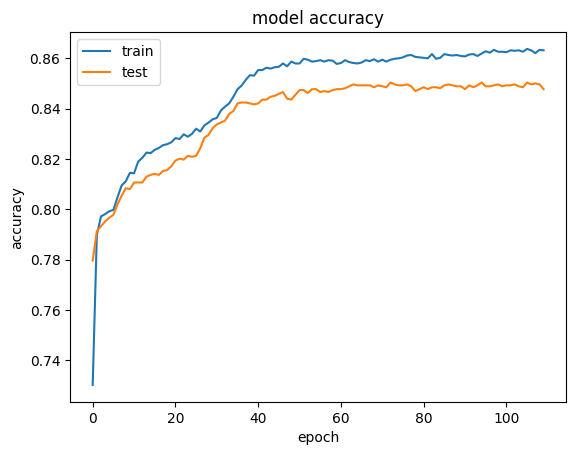

In [40]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Training Accuracy**: Will keep going up.  **Validation Accuracy**: Will go up initially, reach a peak, and may go down if overfitting occurs.

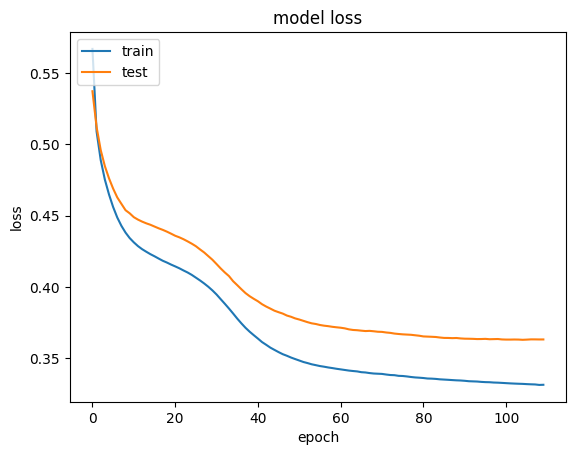

In [41]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Training Loss**: Decreases steadily, as expected, with more training.
**Validation Loss:** Will likely decrease initially but then may start increasing after a certain number of epochs due to overfitting.

Part 3: Making the predictions and evaluating the model

In [42]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [43]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[1548,   59],
       [ 225,  168]])

In [46]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [47]:
score

0.858

The ANN model was 85% accurate in predicting the number of customers who will be exiting the bank.